<a href="https://colab.research.google.com/github/MeFabiLuz/Marketing_Analitics/blob/main/An%C3%A1lise_de_Performance_de_Campanhas_Digitais_e_Otimiza%C3%A7%C3%A3o_de_ROAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importação dos dados


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv("/content/dados_marketing_analytics_campanhas.csv")



##2.Visão inicial

In [2]:

# Olhar primeiras linhas
df.head()

,data,campanha,publico,criativo,impressoes,cliques,custo,conversoes,receita,cpc,ctr,taxa_conversao,roas
0,2025-01-01,Pesquisa_Google_Branqueamento_Dental,Feminino_18_24,Criativo_A_Imagem_Produto,2849,175,137.06,3,393.83,0.783200,0.061425,0.017143,2.873413
1,2025-01-01,Pesquisa_Google_Branqueamento_Dental,Feminino_18_24,Criativo_B_Modelo_Usando,3908,255,202.54,6,713.67,0.794275,0.065251,0.023529,3.523600
2,2025-01-01,Pesquisa_Google_Branqueamento_Dental,Feminino_18_24,Criativo_C_Video_Curto,3509,207,198.71,2,261.55,0.959952,0.058991,0.009662,1.316240
3,2025-01-01,Pesquisa_Google_Branqueamento_Dental,Feminino_25_34,Criativo_A_Imagem_Produto,3914,274,208.12,7,843.37,0.759562,0.070005,0.025547,4.052326
4,2025-01-01,Pesquisa_Google_Branqueamento_Dental,Feminino_25_34,Criativo_B_Modelo_Usando,3865,319,348.78,4,511.56,1.093354,0.082536,0.012539,1.466713


##3.Entender tamanho e tipos dos dados

In [3]:
df.shape


(2160, 13)

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            2160 non-null   object 
 1   campanha        2160 non-null   object 
 2   publico         2160 non-null   object 
 3   criativo        2160 non-null   object 
 4   impressoes      2160 non-null   int64  
 5   cliques         2160 non-null   int64  
 6   custo           2160 non-null   float64
 7   conversoes      2160 non-null   int64  
 8   receita         2160 non-null   float64
 9   cpc             2160 non-null   float64
 10  ctr             2160 non-null   float64
 11  taxa_conversao  2160 non-null   float64
 12  roas            2160 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 219.5+ KB


In [13]:
df.describe()

,impressoes,cliques,custo,conversoes,receita,cpc,ctr,taxa_conversao,roas
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,6222.203704,221.415278,126.322671,5.068056,437.760190,0.574212,0.040666,0.022684,3.328119
std,2307.262400,53.850532,57.520706,2.966776,331.537584,0.232123,0.016686,0.012294,1.807232
min,2282.000000,100.000000,36.600000,0.000000,0.000000,0.280000,0.015853,0.000000,0.000000
25%,4104.000000,182.000000,80.835000,3.000000,189.760000,0.382468,0.026485,0.013785,2.047845
50%,6244.000000,214.500000,111.185000,5.000000,347.020000,0.491329,0.037433,0.021633,3.131870
75%,8048.250000,252.000000,164.220000,7.000000,602.300000,0.736710,0.052443,0.030303,4.374131
max,12062.000000,420.000000,366.320000,20.000000,2498.700000,1.124524,0.084310,0.081395,12.991280


In [15]:
df.isnull().sum()

,0
data,0
campanha,0
publico,0
criativo,0
impressoes,0
cliques,0
custo,0
conversoes,0
receita,0
cpc,0


##4.Limpeza e pequenos ajustes

In [18]:
# Converter data para datetime
df["data"] = pd.to_datetime(df["data"])

# Garantir que métricas derivadas não tenham infinito
df["cpc"] = df["custo"] / df["cliques"].replace(0, np.nan)
df["ctr"] = df["cliques"] / df["impressoes"].replace(0, np.nan)
df["taxa_conversao"] = df["conversoes"] / df["cliques"].replace(0, np.nan)
df["roas"] = df["receita"] / df["custo"].replace(0, np.nan)

# Remover linhas totalmente sem custo e receita (se houver)
df = df.dropna(subset=["custo", "receita"])


##5.Análise exploratória (EDA)

In [19]:
campanha_agg = df.groupby("campanha").agg(
    impressoes=("impressoes", "sum"),
    cliques=("cliques", "sum"),
    custo=("custo", "sum"),
    conversoes=("conversoes", "sum"),
    receita=("receita", "sum")
).reset_index()

campanha_agg["ctr"] = campanha_agg["cliques"] / campanha_agg["impressoes"]
campanha_agg["taxa_conversao"] = campanha_agg["conversoes"] / campanha_agg["cliques"]
campanha_agg["roas"] = campanha_agg["receita"] / campanha_agg["custo"]

campanha_agg.sort_values("roas", ascending=False)


,campanha,impressoes,cliques,custo,conversoes,receita,ctr,taxa_conversao,roas
2,Pesquisa_Google_Branqueamento_Dental,1753075,114594,104609.61,3371,404809.18,0.065367,0.029417,3.869713
1,Meta_Conversao_Biquini_Verao,2899656,127185,78125.32,3275,294579.70,0.043862,0.025750,3.770605
0,Instagram_Reels_Apresentacao_Marca,4709128,102672,41966.67,1495,119947.60,0.021803,0.014561,2.858163
3,Shopee_Ads_Chinelo_Slide,4078101,133806,48155.37,2806,126225.53,0.032811,0.020971,2.621214


##6.Visualizar ROAS por campanha

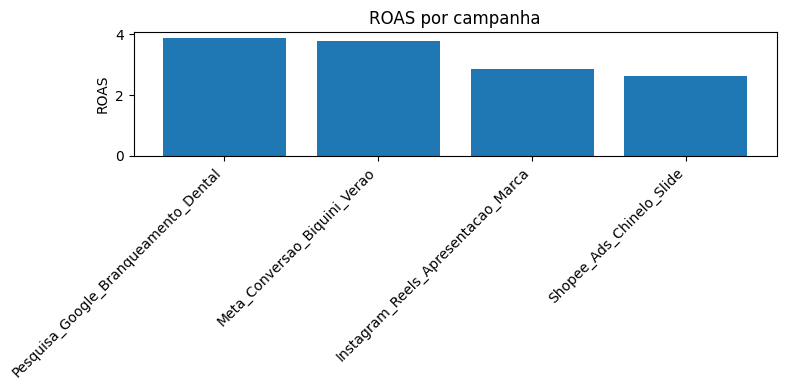

In [20]:
plt.figure(figsize=(8, 4))
ordem = campanha_agg.sort_values("roas", ascending=False)
plt.bar(ordem["campanha"], ordem["roas"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("ROAS")
plt.title("ROAS por campanha")
plt.tight_layout()
plt.show()


##7.Públicos mais valiosos

In [21]:
publico_agg = df.groupby("publico").agg(
    custo=("custo", "sum"),
    receita=("receita", "sum"),
    conversoes=("conversoes", "sum"),
    cliques=("cliques", "sum"),
    impressoes=("impressoes", "sum")
).reset_index()

publico_agg["ctr"] = publico_agg["cliques"] / publico_agg["impressoes"]
publico_agg["taxa_conversao"] = publico_agg["conversoes"] / publico_agg["cliques"]
publico_agg["roas"] = publico_agg["receita"] / publico_agg["custo"]

publico_agg.sort_values("roas", ascending=False)


,publico,custo,receita,conversoes,cliques,impressoes,ctr,taxa_conversao,roas
0,Feminino_18_24,87381.23,305144.73,3543,153317,4422580,0.034667,0.023109,3.492108
1,Feminino_25_34,106366.84,367307.25,4247,186993,4852833,0.038533,0.022712,3.453212
2,Masculino_18_34,79108.90,273110.03,3157,137947,4164547,0.033124,0.022886,3.452330


##8.Efeito do criativo

In [22]:
criativo_agg = df.groupby("criativo").agg(
    custo=("custo", "sum"),
    receita=("receita", "sum"),
    cliques=("cliques", "sum"),
    conversoes=("conversoes", "sum"),
    impressoes=("impressoes", "sum")
).reset_index()

criativo_agg["ctr"] = criativo_agg["cliques"] / criativo_agg["impressoes"]
criativo_agg["taxa_conversao"] = criativo_agg["conversoes"] / criativo_agg["cliques"]
criativo_agg["roas"] = criativo_agg["receita"] / criativo_agg["custo"]

criativo_agg.sort_values("roas", ascending=False)


,criativo,custo,receita,cliques,conversoes,impressoes,ctr,taxa_conversao,roas
2,Criativo_C_Video_Curto,87370.62,306012.08,153660,3556,4404460,0.034887,0.023142,3.502460
0,Criativo_A_Imagem_Produto,80083.07,277563.75,140285,3229,4210529,0.033318,0.023017,3.465948
1,Criativo_B_Modelo_Usando,105403.28,361986.18,184312,4162,4824971,0.038200,0.022581,3.434297


##9.Série temporal – evolução diária

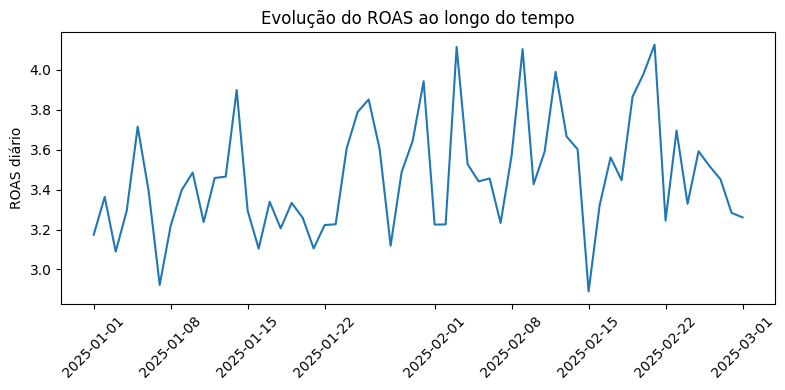

In [23]:
diario = df.groupby("data").agg(
    custo=("custo", "sum"),
    receita=("receita", "sum")
).reset_index()

diario["roas"] = diario["receita"] / diario["custo"]

plt.figure(figsize=(8, 4))
plt.plot(diario["data"], diario["roas"])
plt.xticks(rotation=45)
plt.ylabel("ROAS diário")
plt.title("Evolução do ROAS ao longo do tempo")
plt.tight_layout()
plt.show()


##10.Mini-modelo de previsão / explicação

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Features categóricas em dummies
df_model = df.dropna(subset=["receita", "custo", "cliques"])
X = pd.get_dummies(
    df_model[["impressoes", "cliques", "custo", "campanha", "publico", "criativo"]],
    drop_first=True
)
y = df_model["receita"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.5077163591044678
MAE: 164.49917735750572
